### Importing 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import calendar as cal
#import plotly.express as px

#try
import seaborn as sns
import warnings

In [2]:
warnings.filterwarnings('ignore')
datasetT3 = pd.read_excel("T-measures.xlsx")
#datasetIncidentOverviews = pd.read_excel("Incident Overviews.xlsx")
datasetOverviewsDelays = pd.read_excel("Overviews Delays.xlsx")

In [3]:
datasetIncidentOverviews = pd.read_excel("Incident Overviews.xls")

# Basic checks

In [4]:
datasetT3.shape #check rows and columns

(22441, 9)

In [5]:
datasetIncidentOverviews.shape

(557, 35)

In [6]:
datasetOverviewsDelays.shape

(2653, 28)

In [7]:
datasetIncidentOverviews.isna().sum()
#datasetIncidentOverviews.describe()

Inc Value                        0
Inc Date                         0
Dispute Status                   0
Bugle Mgr                        0
Trust Mgr                        0
Nr Mgr                           0
Inc Cause                        0
Root Cause                     507
Root Cause Desc                  0
Inc Location                    10
Memo                             0
Equip                            0
Sum Total Inc Mins               0
Sum Primary Delay Mins           0
Sum Reactnry Delay Mins          0
Count Cape                       0
Count Pine                       0
Count Calv                       0
Count Fts                        0
Count Journeys Affected          0
Sum Delay Mins                   0
Notes                            0
Kpi Code                         0
Bugle Status                     0
Rsp Period                       0
Count Dft Full Cancs             0
Count Dft Part & Unkn Cancs      0
Turn                           547
Paynum              

# Preprocessing

## Removing columns with NULL Values

Remove columns with high( >90%)  NULL values

### datasetIncidentOverviews table (April 2020 to 5 November 2021)

In [8]:
# Drop the unnecessary features
print(datasetIncidentOverviews.shape)
datasetIncidentOverviews = datasetIncidentOverviews.drop(["Root Cause","Turn", "Paynum", "Fault System"], axis = 1)
print(datasetIncidentOverviews.shape)

(557, 35)
(557, 31)


In [9]:
#Check duplicate entries
duplicateEntries = datasetIncidentOverviews["Inc Value"].value_counts()[0:4].index.tolist()

In [10]:
datasetIncidentOverviews[datasetIncidentOverviews["Inc Value"].isin(duplicateEntries)]

,Inc Value,Inc Date,Dispute Status,Bugle Mgr,Trust Mgr,Nr Mgr,Inc Cause,Root Cause Desc,Inc Location,Memo,...,Kpi Code,Bugle Status,Rsp Period,Count Dft Full Cancs,Count Dft Part & Unkn Cancs,Count Service Recovery,Inc Cause Short Desc,Ppm Failure Count D,Casl Failure Count D,Weather Code
124,736758,2021-06-12,A,ISGW,IQWC,OQWC,JH,Root Cause Desc,XCI LLE,XCI LLE CY689 ESR CRT SPEED,...,110B,New,22/03,0.0,0,0,HEAT SPEED,0.00,0.00,NR Other
125,736758,2021-06-12,A,ISGW,IQWC,OQWC,JH,Root Cause Desc,XCI LLE,XCI LLE CY689 ESR CRT SPEED,...,110B,New,22/04,0.0,0,0,HEAT SPEED,0.32,0.00,NR Other
126,736758,2021-06-12,A,ISGW,IQWC,OQWC,JH,Root Cause Desc,XCI LLE,XCI LLE CY689 ESR CRT SPEED,...,110B,New,22/05,0.0,0,0,HEAT SPEED,0.00,0.00,NR Other
227,384623,2020-12-12,D,VHFZ,VHFZ,OQFR,VW,Root Cause Desc,XYJ RUN,AVANTI 50MPH FLOODING XYJ RUN,...,701F,Referred,21/09,0.0,0,1,WEATHER,0.00,0.00,VW
228,384623,2020-12-12,D,VHFZ,VHFZ,OQFR,VW,Root Cause Desc,XYJ RUN,AVANTI 50MPH FLOODING XYJ RUN,...,701F,Referred,21/10,0.0,0,0,WEATHER,1.42,0.13,VW
405,399949,2020-12-19,A,RTSC,XQLD,OQL8,X2,Root Cause Desc,BEATCKS LOC,BEATCKS LOC 20 ESR U/L,...,110A,New,21/10,8.0,39,0,SEV FLOODS,67.57,51.74,NR Severe
406,399949,2020-12-19,A,RTSC,XQLD,OQL8,X2,Root Cause Desc,BEATCKS LOC,BEATCKS LOC 20 ESR U/L,...,110A,New,21/11,0.0,0,0,SEV FLOODS,12.24,1.40,NR Severe
553,989307,2021-09-27,D,RTGW,XQWS,OQWS,X2,Root Cause Desc,BNG HHD,BNG HHD CY703 WEATHER,...,110A,New,22/07,0.0,0,0,SEV FLOODS,4.09,0.32,NR Severe
554,989307,2021-09-27,D,RTGW,XQWS,OQWS,X2,Root Cause Desc,BNG HHD,BNG HHD CY703 WEATHER,...,110A,New,22/08,0.0,0,0,SEV FLOODS,1.19,0.00,NR Severe


In [11]:
#Get date range of dataset
print(datasetIncidentOverviews["Inc Date"].min(), datasetIncidentOverviews["Inc Date"].max())

2020-04-12 00:00:00 2021-11-05 00:00:00


This dataset contains data from April 2020

## Feature selection and Feature Engineering

In [12]:
datasetIncidentOverviews_modified =  datasetIncidentOverviews.copy()

In [13]:
#Feature selectoin to retain some columns only
datasetIncidentOverviews_modified = datasetIncidentOverviews_modified[["Inc Date", "Inc Cause", "Inc Location","Memo","Sum Total Inc Mins", "Sum Primary Delay Mins","Sum Reactnry Delay Mins", "Count Journeys Affected",
                                                                       "Sum Delay Mins", "Rsp Period", "Count Dft Full Cancs", "Count Dft Part & Unkn Cancs", "Inc Cause Short Desc", "Ppm Failure Count D", "Casl Failure Count D", "Weather Code"]]

In [14]:
datasetIncidentOverviews_modified["Date"] = pd.DatetimeIndex(datasetIncidentOverviews_modified.iloc[:,0]).day
datasetIncidentOverviews_modified["Month"] = pd.DatetimeIndex(datasetIncidentOverviews_modified.iloc[:,0]).month
datasetIncidentOverviews_modified["Year"] = pd.DatetimeIndex(datasetIncidentOverviews_modified.iloc[:,0]).year
datasetIncidentOverviews_modified["Week"] = pd.DatetimeIndex(datasetIncidentOverviews_modified.iloc[:,0]).week

In [15]:
#datasetIncidentOverviews_modified[datasetIncidentOverviews_modified["Year"] == 2020][datasetIncidentOverviews_modified["Month"] == 6 ]

### datasetOverviewsDelays ( April 2021 to Oct 2021)

In [16]:
datasetOverviewsDelays.isnull().sum()
print(datasetOverviewsDelays.shape)
datasetOverviewsDelays = datasetOverviewsDelays.drop(["Root Cse","Turn", "Pno"], axis = 1)

(2653, 28)


In [17]:
print(datasetOverviewsDelays["Jny Dt Rw"].min(), datasetOverviewsDelays["Jny Dt Rw"].max())

2021-04-06 00:00:00 2021-11-12 00:00:00


This contains only data from April 2021 to Oct 2021

In [18]:
print(datasetOverviewsDelays)
#datasetOverviewsDelays = datasetOverviewsDelays.drop(["Root Cse","Turn", "Pno"], axis = 1)

      Jny Dt Rw      Hcde Strt Time     Org        Dst  Bgl Prft Cent  \
0    2021-04-13  729G48M8     22:30  EUSTON  BHAMNEWST       21000000   
1    2021-04-13  729G48M8     22:30  EUSTON  BHAMNEWST       21000000   
2    2021-04-13  729G48M8     22:30  EUSTON  BHAMNEWST       21000000   
3    2021-04-13  729G48M8     22:30  EUSTON  BHAMNEWST       21000000   
4    2021-04-13  729G48M8     22:30  EUSTON  BHAMNEWST       21000000   
...         ...       ...       ...     ...        ...            ...   
2648 2021-11-06  721D91MU     17:10  EUSTON   HOLYHEAD       22000000   
2649 2021-11-08  421D91MX     18:56   CREWE   HOLYHEAD       22000000   
2650 2021-11-09  421D82MF     09:51   CREWE   HOLYHEAD       22000000   
2651 2021-11-10  421D91MX     18:56   CREWE   HOLYHEAD       22000000   
2652 2021-11-12  421D84MJ     11:48   CREWE   HOLYHEAD       22000000   

      P  Term  Dly Mins    Dly Loc Inc Cse  ... Disp Stat  Inc Loc Inc Val  \
0         1.0         4  BLETCHLEY      JH  .

In [19]:
#datasetOverviewsDelays.head()
#A= 22114000 and F=23121000.
#checking data for 2 routes only
datasetOverviewsDelays2 = datasetOverviewsDelays[datasetOverviewsDelays["Bgl Prft Cent"].isin( [22114000, 23121000]) ]

In [20]:
#gets unique incident codes
datasetOverviewsDelays2["Inc Cse"].value_counts()

JH    544
X4    221
X2    208
XW    169
JK     33
VW     28
X3      2
IW      1
Name: Inc Cse, dtype: int64

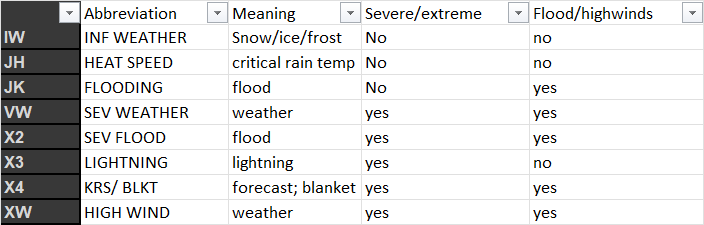

mapping of weather codes shows which codes need to be considered. 

'Inc Cse' has no empty values




In [21]:
#gets unique delay codes
#datasetOverviewsDelays["Dly Cse"].value_counts()

In [22]:
datasetOverviewsDelays_modified =  datasetOverviewsDelays.copy()

In [23]:
#Feature engineering
#adding date, month, year, week columns from dataset
datasetOverviewsDelays_modified["Date"] = pd.DatetimeIndex(datasetOverviewsDelays_modified.iloc[:,0]).day
datasetOverviewsDelays_modified["Month"] = pd.DatetimeIndex(datasetOverviewsDelays_modified.iloc[:,0]).month
datasetOverviewsDelays_modified["Year"] = pd.DatetimeIndex(datasetOverviewsDelays_modified.iloc[:,0]).year
datasetOverviewsDelays_modified["Week"] = pd.DatetimeIndex(datasetOverviewsDelays_modified.iloc[:,0]).week

In [24]:
#datasetOverviewsDelays_modified.head()

### datasetT3

In [25]:
datasetT3.isnull().sum()

Jny Dt Rw                0
Bgl Prft Cent            0
Bgl Prof                 0
Loc                      0
CP6: Within 3 mins       0
CP6: Within 15 mins      0
CP6: Count Trains Run    0
CP6: Within 3 mins %     0
CP6: Within 15 mins %    0
dtype: int64

In [26]:
datasetT3_modified = datasetT3.copy()

In [27]:
#Extracting day, month, year
datasetT3_modified["Date"] = pd.DatetimeIndex(datasetT3_modified.iloc[:,0]).day
datasetT3_modified["Month"] = pd.DatetimeIndex(datasetT3_modified.iloc[:,0]).month
datasetT3_modified["Year"] = pd.DatetimeIndex(datasetT3_modified.iloc[:,0]).year
datasetT3_modified["Week"] = pd.DatetimeIndex(datasetT3_modified.iloc[:,0]).week

In [28]:
#datasetT3_modified["Month"] = datasetT3_modified["Month"].apply(lambda x: cal.month_abbr[x])

In [29]:
datasetT3_modified.head()

,Jny Dt Rw,Bgl Prft Cent,Bgl Prof,Loc,CP6: Within 3 mins,CP6: Within 15 mins,CP6: Count Trains Run,CP6: Within 3 mins %,CP6: Within 15 mins %,Date,Month,Year,Week
0,2021-11-13,21000000,EUS-W/MIDS,BHAM INTL,28,37,37,75.68,100.0,13,11,2021,45
1,2021-11-13,21000000,EUS-W/MIDS,BHAMNEWST,27,37,37,72.97,100.0,13,11,2021,45
2,2021-11-13,21000000,EUS-W/MIDS,COVENTRY,26,37,37,70.27,100.0,13,11,2021,45
3,2021-11-13,21000000,EUS-W/MIDS,EUSTON,32,37,37,86.49,100.0,13,11,2021,45
4,2021-11-13,21000000,EUS-W/MIDS,MILTON KC,4,7,7,57.14,100.0,13,11,2021,45


In [30]:

#get summary
datasetT3_modified.describe()
print(datasetT3_modified.shape)

(22441, 13)


# Info Dump

Preston	PRE
Kirkham & Wesham	KKM
Poulton-le-Fylde	PFY
Blackpool North	BPN
Lancaster	LAN
Oxenholme Lake District	OXN
Penrith	PNR
Carlisle	CAR
Lockerbie	LOC
Carstairs	CRS
Haymarket	HYM
Edinburgh	EDB
Motherwell	MTH
Glasgow	GLC

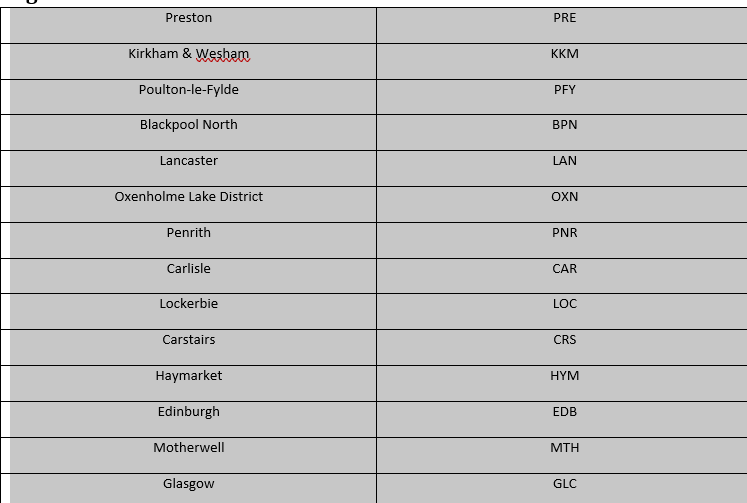

From Appendix 1 and 2 ->
North of preston Location codes

In [31]:
#Selecting areas in the north of preston

locCodesNorth = ['PRE', 'KKM', 'PFY', 'BPN', 'LAN', 'OXN','PNR', 'CAR','LOC', 'CRS','HYM','EDB', 'MTH', 'GLC']
locNamesNorth = ['PRESTON', 'BPOOL NTH', 'LANCASTER', 'OXENHOLME', 'PENRITH', 'CARLISLE', 'LOCKERBIE', 'CARSTAIRS', 'HAYMARKET', 'EDINBURGH', 'MOTHERWELL', 'GLASGOW C']

# EDA on Incidents

## Incidents North of Preston

In [32]:
dtIncidents = datasetIncidentOverviews_modified

In [33]:
#new dataset for north of preston
incidentsNorth = dtIncidents[dtIncidents["Inc Location"].isin(locCodesNorth)]
print(incidentsNorth.shape)

(30, 20)


In [34]:
dtIncidents = datasetIncidentOverviews_modified #incidentsNorth 

In [35]:
print(dtIncidents.shape)

(557, 20)


## Group by year/ week/ month

In [36]:
# dtIncidentsByYear = dtIncidents.groupby(["Year"])
# dtIncidentsByYear.sum().plot(kind='bar', figsize = (18,6), legend=True)
# #dtIncidentsByYear.sum().plot.bar()

In [37]:
dtIncidentsByYear = dtIncidents.groupby(["Week","Year"])
# dtIncidentsByYear[].sum().plot(kind='bar', figsize = (18,6), legend=True)

In [38]:
#dtIncidentsByYear.get_group((15,2020)).sort_values(by=["Week"])

<AxesSubplot:title={'center':'Delay Minutes for each week'}, xlabel='Week,Year'>

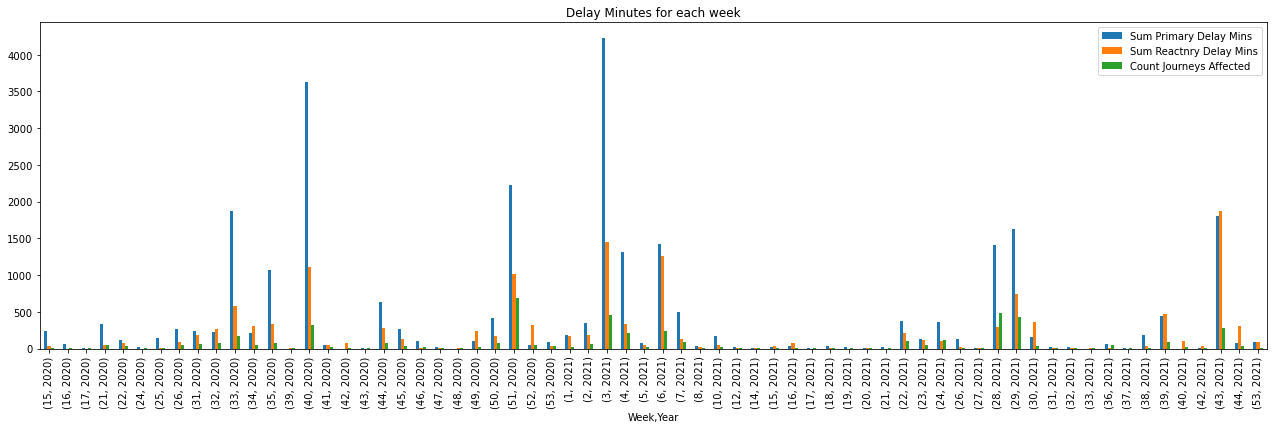

In [39]:
#dtIncidentsByYear = dtIncidents.groupby(["Year"])
dtIncidentsByYear["Sum Primary Delay Mins", "Sum Reactnry Delay Mins", "Count Journeys Affected"].sum().sort_values(by=['Year','Week']).plot(kind='bar', figsize = (22,6), legend=True, title = "Delay Minutes for each week")
#dtIncidentsByYear.sum().plot.bar()
#plt.savefig(img1)


In [40]:
# plt.figure(figsize = (18,6)) 

# dtIncidentsByYear["Sum Delay Mins", "Count Journeys Affected"].sum().sort_values(by=['Year','Week'])

# sns.barplot(x= dtIncidentsByYear, y = dtIncidentsByYear["Sum Delay Mins", "Count Journeys Affected"].sum())

## Group by Incident Cause

In [41]:
selColsForIncidents = ["Sum Total Inc Mins", "Sum Primary Delay Mins","Sum Reactnry Delay Mins", "Count Journeys Affected"]

In [42]:
dtIncidents["Inc Cause Short Desc"].value_counts()

SEV FLOODS    121
WEATHER       118
HEAT SPEED    105
SNOW           60
KRS/BLKT       45
FLOODING       37
WIND           36
SEV SNOW       15
COLD           12
LGHTNG          4
LIGHTNING       3
SPL REGS        1
Name: Inc Cause Short Desc, dtype: int64

In [43]:
#Replace 'LGHTNG' value with correct 'LIGHTNING' name
dtIncidents.loc[dtIncidents["Inc Cause Short Desc"] == "LGHTNG", "Inc Cause Short Desc"] = "LIGHTNING"

<AxesSubplot:xlabel='Inc Cause'>

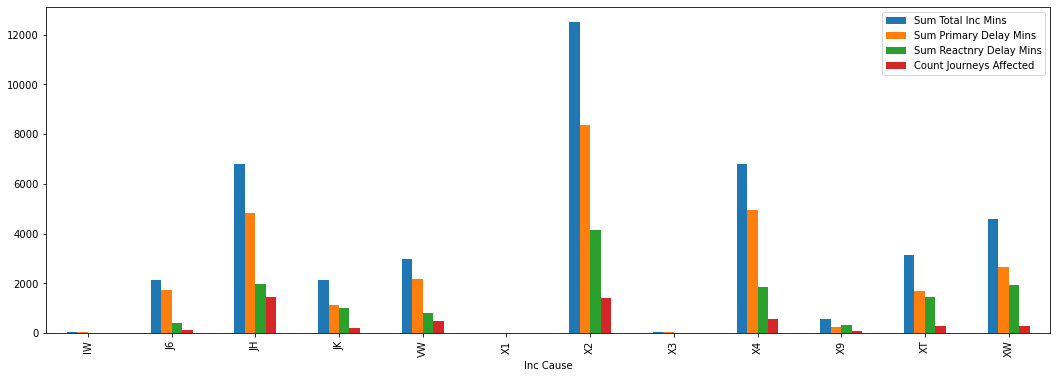

In [44]:
dtIncidentsByCause =  dtIncidents.groupby(["Inc Cause"])
dtIncidentsByCause[selColsForIncidents].sum().plot(kind='bar', figsize = (18,6), legend=True)

VW - severe weather

In [ ]:
dtIncidents[["Sum Total Inc Mins", "Date"]].plot(kind='scatter', x= 'Date',y='Sum Total Inc Mins', figsize = (18,6), legend=True)

In [ ]:
sns.scatterplot(data=dtIncidents, x='Date', y='Sum Total Inc Mins', hue='Inc Cause')

<AxesSubplot:title={'center':'Distribution of Delay Minutes for Weather Conditions'}, xlabel='Inc Cause Short Desc'>

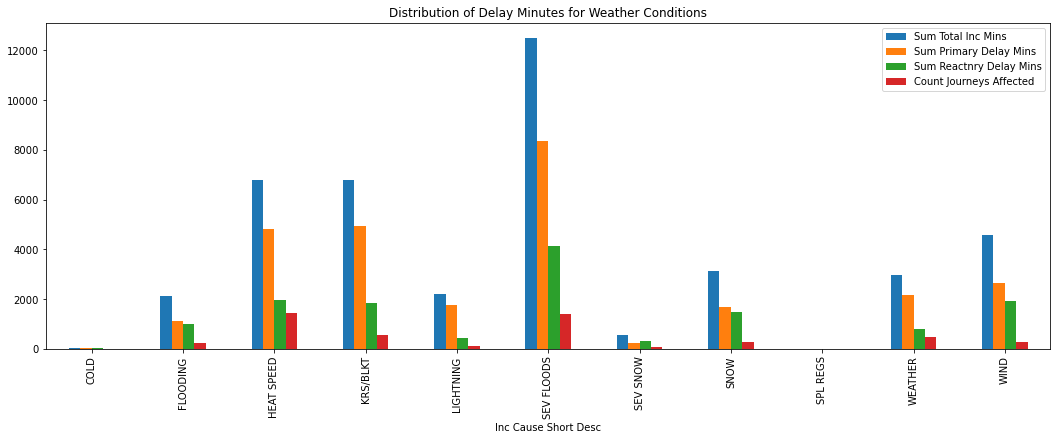

In [47]:
dtIncidentsByCause = dtIncidents.sort_values(by="Inc Cause").groupby(["Inc Cause Short Desc"])
dtIncidentsByCause[selColsForIncidents].sum().plot(kind='bar', figsize = (18,6), legend=True, title="Distribution of Delay Minutes for Weather Conditions")

<AxesSubplot:xlabel='Inc Cause Short Desc'>

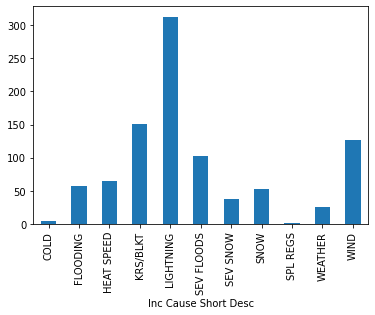

In [48]:
(dtIncidentsByCause["Sum Delay Mins"].sum()/dtIncidentsByCause["Sum Delay Mins"].count()).plot(kind='bar')

<AxesSubplot:xlabel='Inc Cause Short Desc'>

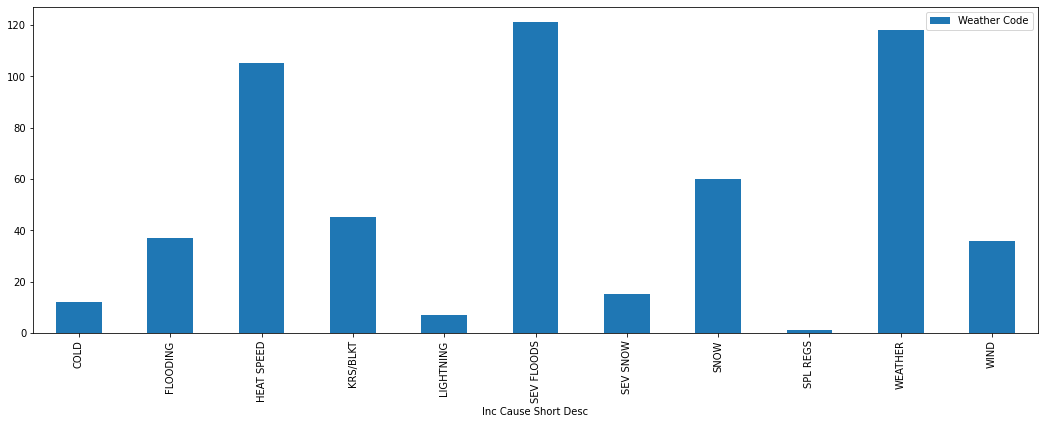

In [49]:
dtIncidentsByCause["Weather Code"].count().plot(kind='bar', figsize = (18,6), legend=True)

### Month of October

In [50]:
dtOctober = dtIncidents[(dtIncidents["Month"] == 10) &  (dtIncidents["Year"] == 2021)]

<AxesSubplot:title={'center':'Weather during October 21'}, xlabel='Inc Cause Short Desc'>

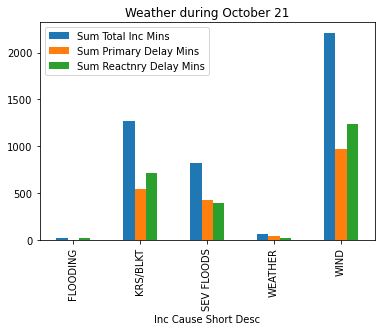

In [51]:
dtOctober.groupby("Inc Cause Short Desc")["Sum Total Inc Mins", "Sum Primary Delay Mins", "Sum Reactnry Delay Mins"].sum().plot(kind = 'bar', title="Weather during October 21")

<AxesSubplot:xlabel='Date'>

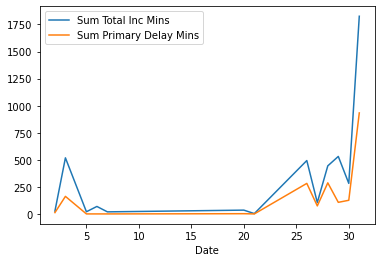

In [52]:
dtOctober.groupby("Date")["Sum Total Inc Mins", "Sum Primary Delay Mins"].sum().plot(kind = 'line')

# EDA on Delays

In [53]:
#Working on overview delays dataset
datasetOverviewsDelays
selColsForDelays = ["Dly Mins"]

## Delays in North

In [54]:
dtDelays = datasetOverviewsDelays_modified

In [55]:
delaysNorth = datasetOverviewsDelays_modified[datasetOverviewsDelays_modified["Dly Loc"].isin(locNamesNorth)]

In [56]:
delaysNorth.shape

(276, 29)

In [57]:
dtDelays = delaysNorth

## Group by year/ week/ month

In [58]:
dtDelaysByYear = dtDelays.groupby(["Week","Year"])
# dtIncidentsByYear[].sum().plot(kind='bar', figsize = (18,6), legend=True)

<AxesSubplot:xlabel='Week,Year'>

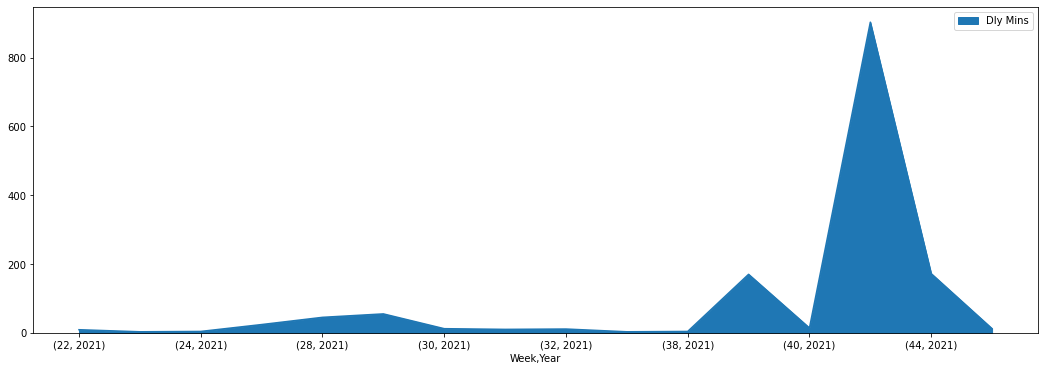

In [59]:
#dtIncidentsByYear = dtIncidents.groupby(["Year"])
dtDelaysByYear[selColsForDelays].sum().plot(kind='area', figsize = (18,6), legend=True)
#dtIncidentsByYear.sum().plot.bar()

### Group by Incident cause

In [60]:
#Inc Cse	Dly Cse	Inc Causd	Bgl 
dtDelaysIncCse = dtDelays.groupby("Inc Cse")
countsByIncCode = dtDelaysIncCse["Inc Cse"].count()
totalTimeByIncCode = dtDelaysIncCse["Dly Mins"].sum()

<AxesSubplot:xlabel='Inc Cse'>

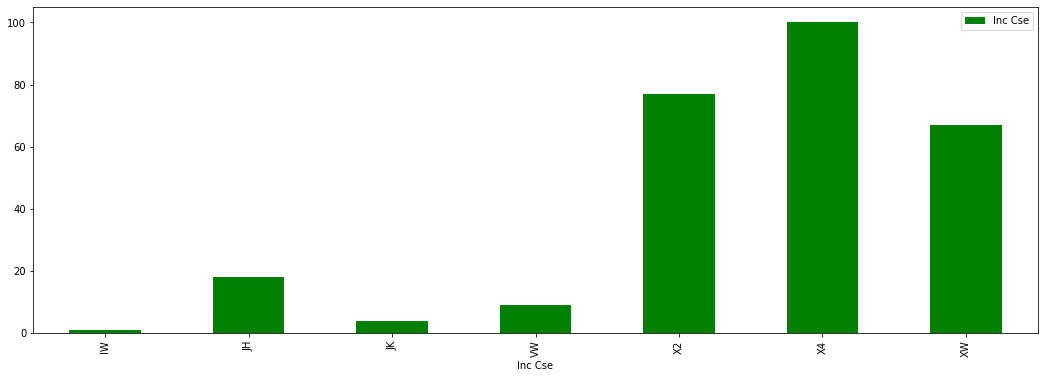

In [61]:
(countsByIncCode).plot(kind='bar', figsize = (18,6), legend = True, color="green")

<AxesSubplot:xlabel='Date', ylabel='Dly Mins'>

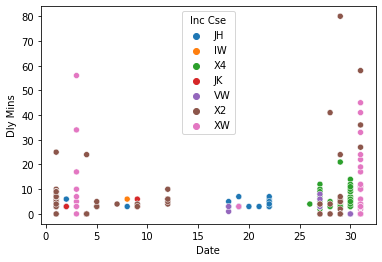

In [62]:
sns.scatterplot(data=dtDelays, x='Date', y='Dly Mins', hue='Inc Cse', lw=1)

In [63]:
dtDelays[["Date","Dly Mins"]]

,Date,Dly Mins
68,2,3
149,2,6
194,8,3
681,18,3
704,18,5
...,...,...
2615,1,4
2626,1,7
2631,1,3
2636,1,9


### Group by Delay cause

In [64]:
dtDelays["Dly Cse"]

68      YI
149     YO
194     YC
681     YC
704     YD
        ..
2615    YD
2626    YC
2631    YB
2636    YD
2639    YC
Name: Dly Cse, Length: 276, dtype: object

# EDA on T-3 and T-15 data

In [65]:
dtTrainsByDelayTimesT3 = datasetT3_modified[["Year","Month","Date", "Week", "Loc", "CP6: Within 3 mins", "CP6: Within 15 mins", "CP6: Count Trains Run"]]
dtTrainsByDelayTimesT3.head()

,Year,Month,Date,Week,Loc,CP6: Within 3 mins,CP6: Within 15 mins,CP6: Count Trains Run
0,2021,11,13,45,BHAM INTL,28,37,37
1,2021,11,13,45,BHAMNEWST,27,37,37
2,2021,11,13,45,COVENTRY,26,37,37
3,2021,11,13,45,EUSTON,32,37,37
4,2021,11,13,45,MILTON KC,4,7,7


If some of the trains were not within 15 mins, then we can get the number of trains delayed beyond 15 mins by subtracting number of trains run that day by number of trains that arrived with 15 mins.

In [66]:
dtTrainsByDelayTimesNorth = dtTrainsByDelayTimesT3[dtTrainsByDelayTimesT3["Loc"].isin(locNamesNorth)]

In [67]:
dtTrainsByDelayTimes = dtTrainsByDelayTimesNorth

In [68]:
dtTrainsByDelayTimes["trainsNotIn15"] = dtTrainsByDelayTimes["CP6: Count Trains Run"] - dtTrainsByDelayTimes["CP6: Within 15 mins"]
dtTrainsByDelayTimes.head()

#Trains delayed by more than 15 mins
dtTrainsByDelayTimes = dtTrainsByDelayTimes[dtTrainsByDelayTimes["trainsNotIn15"] >0] #Remove zero

## Grouped by Month

In [69]:
datasetT3_groupedByMonth = dtTrainsByDelayTimes.groupby("Month")
#datasetT3_modified["CP6: Count Trains Run"].shape

### November

In [70]:
datasetT3_Nov = dtTrainsByDelayTimes[dtTrainsByDelayTimes.Month == 11]
datasetT3_Nov.shape

(131, 9)

In [71]:
selectedCols = ["CP6: Within 3 mins", "CP6: Within 15 mins", "CP6: Count Trains Run"]

<AxesSubplot:title={'center':'Plot for Month of November'}, xlabel='Date'>

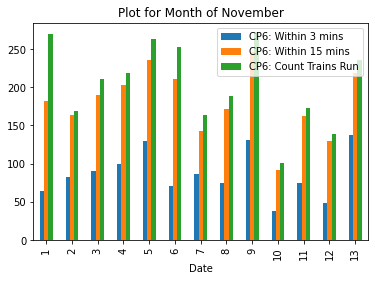

In [72]:
datasetT3_Nov.groupby("Date")[selectedCols].sum().plot.bar(title ="Plot for Month of November")

<AxesSubplot:title={'center':'Plot for Month of November'}, xlabel='Date'>

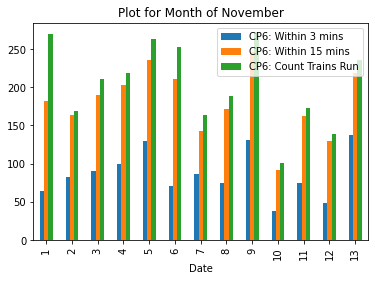

In [73]:
datasetT3_Nov.groupby("Date")[selectedCols].sum().plot.bar(title ="Plot for Month of November")

In [74]:
# dtTrainsByDelayTimes_groupedByMonth = dtTrainsByDelayTimes.groupby("Month")
# dtTrainsByDelayTimes_Nov = dtTrainsByDelayTimes[dtTrainsByDelayTimes.Month == 11]
# dtTrainsByDelayTimes_Nov.shape
# dtTrainsByDelayTimes_Nov.groupby("Date")["CP6: Within 3 mins", "CP6: Within 15 mins", "CP6: Count Trains Run"].sum().plot.bar(title ="Plot for Month of November")

## All Month-wise 

In [75]:
dtTrainsByDelayTimesByMonth = dtTrainsByDelayTimes.groupby("Month")

In [76]:
#sns.barplot(x="Date", y="trainsNotIn15", label="Month", data=dtTrainsByDelayTimes)
#dtTrainsByDelayTimes["Month"]<6

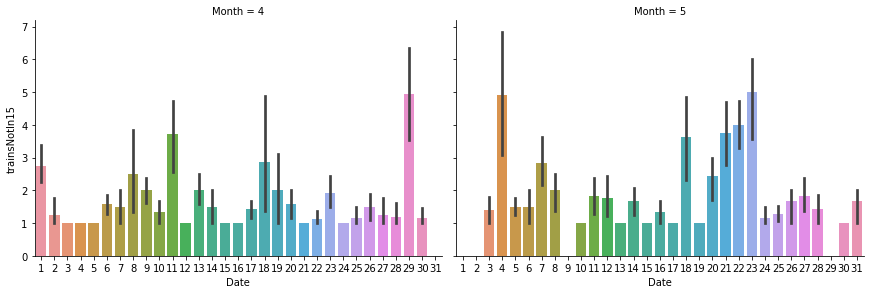

In [77]:
g = sns.catplot(x="Date", y="trainsNotIn15",
                col="Month",
                data=dtTrainsByDelayTimes[dtTrainsByDelayTimes["Month"]<6], 
                kind="bar",
                height=4, aspect=1.5
                );

<AxesSubplot:xlabel='Date', ylabel='trainsNotIn15'>

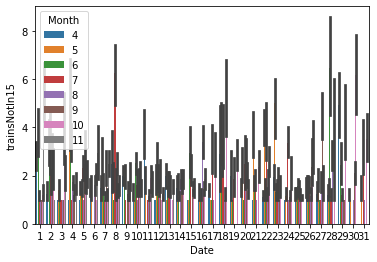

In [78]:
sns.barplot(x="Date", y="trainsNotIn15", hue="Month", data=dtTrainsByDelayTimes)

<AxesSubplot:xlabel='Date'>

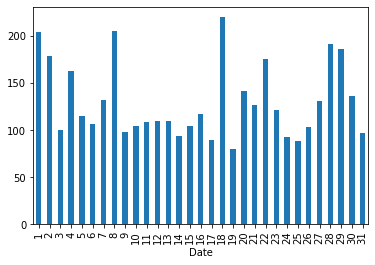

In [79]:
dtTrainsByDelayTimes.groupby(["Date"])["trainsNotIn15"].sum().plot.bar()

<AxesSubplot:title={'center':'Count of trains within 15 mins delay and total trains'}, xlabel='Month'>

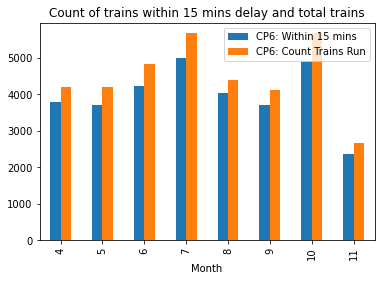

In [80]:
dtTrainsByDelayTimesByMonth["CP6: Within 15 mins", "CP6: Count Trains Run"].sum().plot.bar(title ="Count of trains within 15 mins delay and total trains")

In [81]:
dtTrainsByDelayTimes[dtTrainsByDelayTimes["trainsNotIn15"] >0].count()
dtTrainsByDelayTimes.shape

(1830, 9)

In [82]:
selectedCols.append( "trainsNotIn15")

<AxesSubplot:xlabel='Month'>

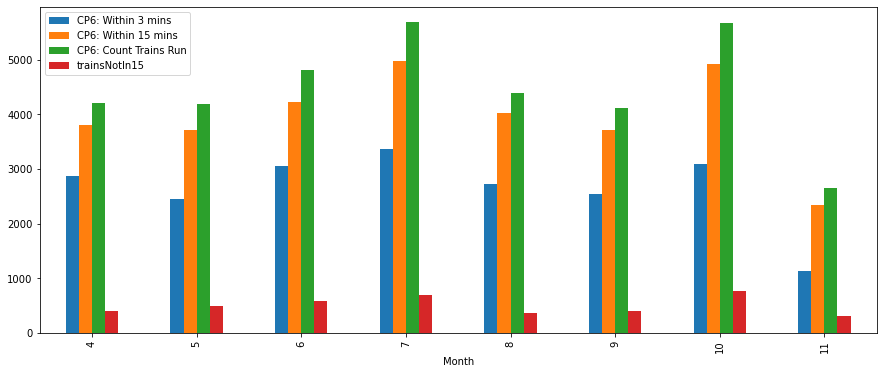

In [83]:
dtTrainsByDelayTimesByMonth[selectedCols].sum().plot(kind = 'bar', figsize = (15,6), title= '')

In [84]:
#for group in dtTrainsByDelayTimesByMonth:
for month in dtTrainsByDelayTimesByMonth.groups:
    g1 = dtTrainsByDelayTimesByMonth.get_group(month)
    print(g1["trainsNotIn15"].sum()/ g1["CP6: Count Trains Run"].sum() * 100)
#count().plot(kind = 'line', figsize = (15,6), title= '')

9.71958174904943
11.641221374045802
12.354651162790697
12.29089628455714
8.16233470132239
9.924775539917496
13.409691629955947
11.534112325669053


In [85]:
dtTrainsByDelayTimesWeek = dtTrainsByDelayTimes.groupby('Week')
WeekPerc = []
#datasetT3_modified
for week in dtTrainsByDelayTimesWeek.groups:
    g1 = dtTrainsByDelayTimesWeek.get_group(week)
    perc = g1["trainsNotIn15"].sum()/ g1["CP6: Count Trains Run"].sum() * 100
    #print(perc)
    WeekPerc.append([week, perc])

In [86]:
wkP = np.array(WeekPerc)
wkP[:,0]
#dtTrainsByDelayTimesWeek.get_group(31)#["perc"] #.count().plot.bar(legend=True, title="Count of trains delayed by more than 15 mins")

array([13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
       26., 27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38.,
       39., 40., 41., 42., 43., 44., 45.])

Text(0, 0.5, 'Percentage')

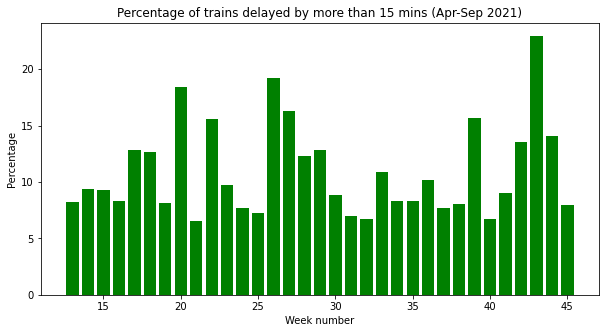

In [87]:
plt.figure(figsize=(10,5))
plt.bar(x=wkP[:,0], height=wkP[:,1], color="green")
plt.title("Percentage of trains delayed by more than 15 mins (Apr-Sep 2021)")
plt.xlabel("Week number")
plt.ylabel("Percentage")

Highest delay seen in July > October

In [88]:
#plt.bar(dtTrainsByDelayTimes["Month"], (dtTrainsByDelayTimes["trainsNotIn15"] >0))

In [89]:
#dtTrainsByDelayTimes[dtTrainsByDelayTimes["trainsNotIn15"]>0][dtTrainsByDelayTimes["Month"]==11]

In [90]:
#Incorrect graph - Nov has only 448 rows but this shows the row number equivalent value
# fig = px.bar(dtTrainsByDelayTimes, x='Month', y='trainsNotIn15')
# fig.show()

In [91]:
#plt.bar(datasetT3_modified["Month"], datasetT3_modified["CP6: Within 3 mins"])

## Grouped by Location

In [92]:
dtTrainsByDelayTimes_groupedByLocation = dtTrainsByDelayTimes[dtTrainsByDelayTimes["Loc"].isin(locNamesNorth)].groupby("Loc")

In [93]:
dtTrainsByDelayTimes

,Year,Month,Date,Week,Loc,CP6: Within 3 mins,CP6: Within 15 mins,CP6: Count Trains Run,trainsNotIn15
53,2021,11,13,45,EDINBURGH,8,12,13,1
56,2021,11,13,45,HAYMARKET,8,12,13,1
57,2021,11,13,45,LANCASTER,10,19,20,1
62,2021,11,13,45,PRESTON,20,31,33,2
80,2021,11,13,45,CARLISLE,12,26,28,2
...,...,...,...,...,...,...,...,...,...
22416,2021,4,1,13,GLASGOW C,22,26,29,3
22417,2021,4,1,13,LANCASTER,14,25,29,4
22423,2021,4,1,13,OXENHOLME,8,21,23,2
22424,2021,4,1,13,PENRITH,8,17,19,2


<AxesSubplot:title={'center':'T3 and T15 data grouped by Location'}, xlabel='Location', ylabel='Count'>

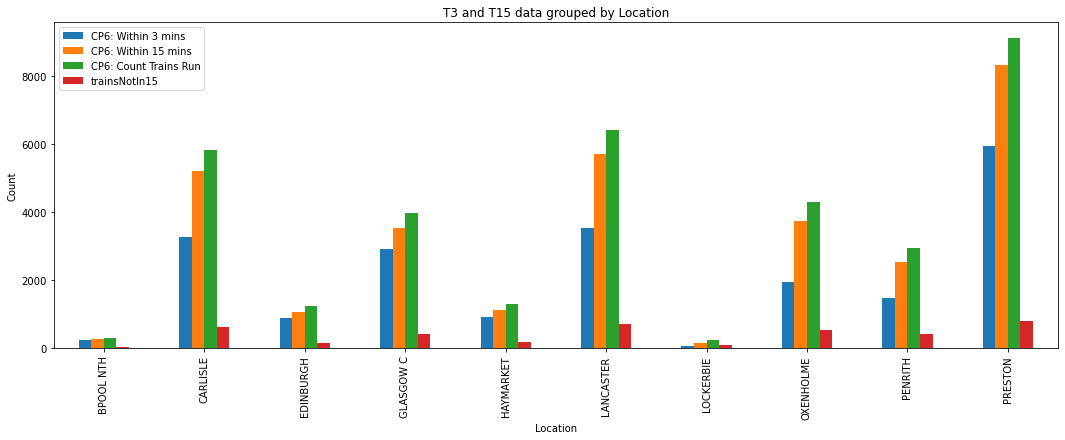

In [94]:
dtTrainsByDelayTimes_groupedByLocation.sum()[selectedCols].plot(kind='bar', figsize = (18,6), legend=True, title="T3 and T15 data grouped by Location", xlabel="Location", ylabel="Count")

In [95]:
#dtTrainsByDelayTimes["Percentage of Delayed Trains"] = (dtTrainsByDelayTimes["trainsNotIn15"]/dtTrainsByDelayTimes["CP6: Count Trains Run"] * 100)

In [96]:
summedByLoc = dtTrainsByDelayTimes.groupby("Loc").sum()
summedByLoc

,Year,Month,Date,Week,CP6: Within 3 mins,CP6: Within 15 mins,CP6: Count Trains Run,trainsNotIn15
Loc,,,,,,,,
BPOOL NTH,58609,224,450,910,244,271,311,40
CARLISLE,543649,2017,4103,8146,3283,5208,5841,633
EDINBURGH,198058,736,1538,2979,888,1073,1246,173
GLASGOW C,379948,1377,2955,5563,2918,3536,3970,434
HAYMARKET,208163,770,1607,3115,925,1140,1317,177
LANCASTER,573964,2104,4332,8489,3528,5707,6417,710
LOCKERBIE,159659,587,1235,2380,66,153,249,96
OXENHOLME,517376,1890,3943,7630,1937,3749,4298,549
PENRITH,446641,1653,3347,6670,1487,2543,2958,415


In [97]:
summedByLoc["Percentage of Delayed Trains"] = (summedByLoc["trainsNotIn15"]/summedByLoc["CP6: Count Trains Run"] * 100)

<AxesSubplot:xlabel='Loc'>

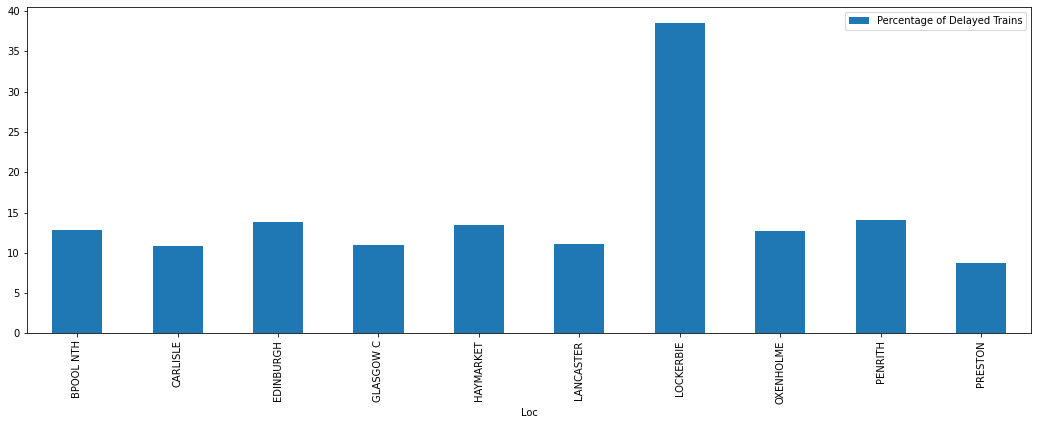

In [98]:
summedByLoc["Percentage of Delayed Trains"].plot(kind = 'bar', figsize = (18,6), legend=True)

In [99]:
#@title
#dtTrainsByDelayTimes_groupedByLocation.plot.bar()